In [1]:
from tensorflow.keras import datasets, models
from tensorflow.keras import Sequential, optimizers
from tensorflow.keras.layers \
import Flatten, Dense, Conv2D, MaxPooling2D
# MNIST 필기체 숫자 데이터세트 가져오기
(train_imgs, train_labels), (test_imgs, test_labels) \
= datasets.mnist.load_data()
# 픽셀 값을 0~1 사이로 정규화
train_imgs, test_imgs \
= train_imgs / 255.0, test_imgs / 255.0
# Conv2D에 맞게 데이터 reshape
train_imgs = train_imgs.reshape(60000, 28, 28, 1)
test_imgs = test_imgs.reshape(10000, 28, 28, 1)

# 모델 구성 후 요약 정보 출력
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu',
input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()
# 모델 컴파일
model.compile(optimizer=optimizers.SGD(0.01, momentum=0.9),
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])
# 학습
model.fit(train_imgs, train_labels, verbose=1, epochs=5)
# 모델 저장
models.save_model(model, 'CNN-mnist')
# 테스트 집합을 대상으로 평가
_, test_acc = model.evaluate(test_imgs, test_labels)
print('인식률 = ', test_acc)

11490434/11490434 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                         

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

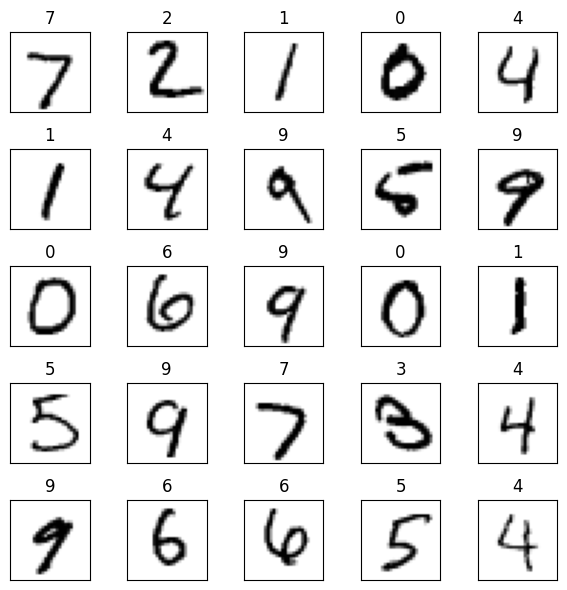

인식률 =  0.9893


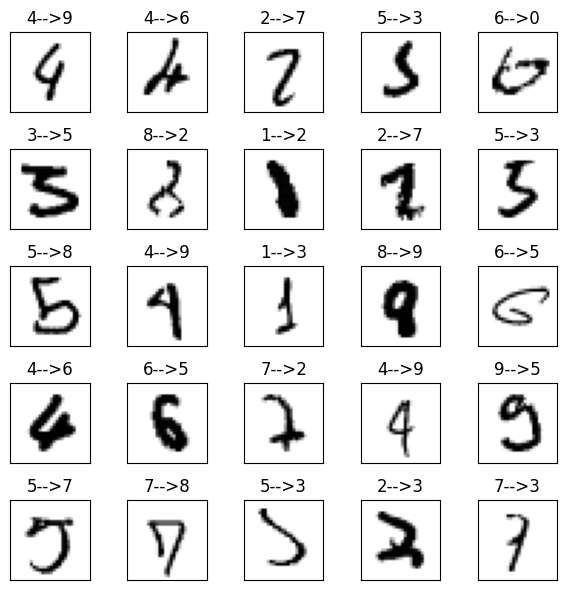

In [2]:
import matplotlib.pyplot as plt
from tensorflow.keras import datasets
from tensorflow.keras import models
import numpy as np
# MNIST 테스트 데이터세트 로드
_, (test_imgs, test_labels) = datasets.mnist.load_data()
# 픽셀 값을 0~1 사이로 정규화
test_imgs = test_imgs / 255.0

# Conv2D에 맞게 데이터 reshape
test_imgs = test_imgs.reshape(10000, 28, 28, 1)
# 저장된 모델 로드
model = models.load_model('CNN-mnist')
model.summary()
# 테스트 집합에 대한 인식 결과 구하기
result = model.predict(test_imgs)
# 첫 25개의 이미지와 인식 결과 디스플레이
plt.figure(figsize=(6, 6), tight_layout=True)
for i in range(25):
    plt.subplot(5, 5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    timg = test_imgs[i].reshape(28, 28)
    plt.imshow(timg, cmap=plt.cm.gray_r)
    plt.title('{}'.format(np.argmax(result[i])))
plt.show()
# 오인식 이미지 리스트를 구함
err_imgs, err_labels = [], []
for i in range(10000):
    lbl = np.argmax(result[i])
    if lbl != test_labels[i]:
        err_imgs.append(test_imgs[i])
        err_labels.append('{}-->{}'.format(test_labels[i], lbl))
print('인식률 = ', (10000 - len(err_labels)) / 10000)
# 첫 25개의 오인식 이미지 디스플레이
plt.figure(figsize=(6, 6), tight_layout=True)
for i in range(min(25, len(err_labels))):
    plt.subplot(5, 5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    timg = err_imgs[i].reshape(28, 28)
    plt.imshow(timg, cmap=plt.cm.gray_r)
    plt.title(err_labels[i])
plt.show()